In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('car_details.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [38]:
def verificar_colunas_com_unico_valor(dataframe):
    colunas_unico_valor = []
    for coluna in dataframe.columns:
        if dataframe[coluna].nunique() == 1:
            colunas_unico_valor.append(coluna)
    return colunas_unico_valor

# Aplicar a função e imprimir o resultado
colunas_com_unico_valor = verificar_colunas_com_unico_valor(df)
print("Colunas com um único valor:", colunas_com_unico_valor)

Colunas com um único valor: []


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [13]:
df1 = df.copy()

In [14]:
df1['brand'] = df1['name'].str.split().str[0]

In [16]:
df1.drop('name', axis=1, inplace=True)

In [19]:
# Reordenar as colunas colocando "brand" em primeiro lugar
cols = ['brand'] + [col for col in df1.columns if col != 'brand']
df1 = df1[cols]

In [20]:
df1.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


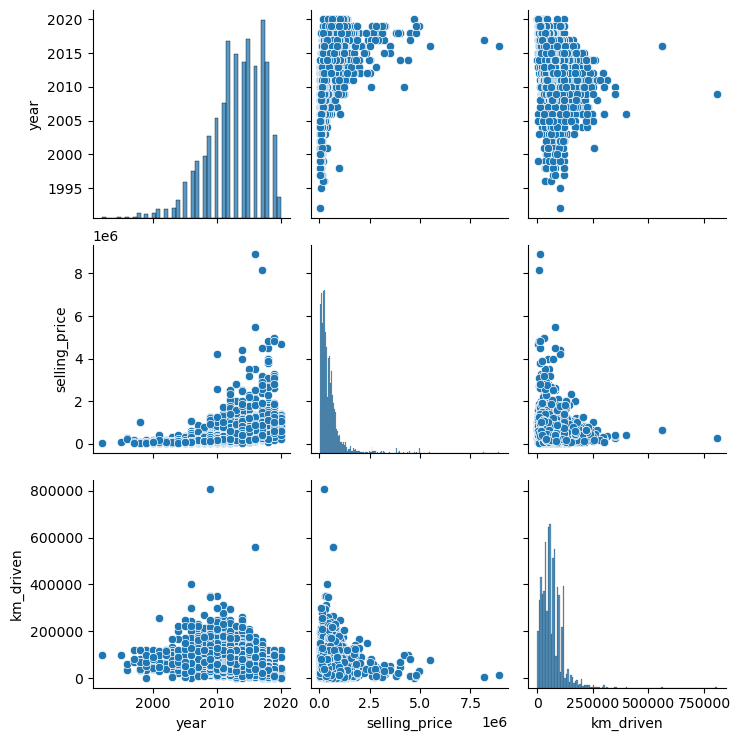

In [30]:
numeric_features = ['year', 'selling_price', 'km_driven',]
sns.pairplot(df1[numeric_features])
plt.show()

In [31]:
df1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


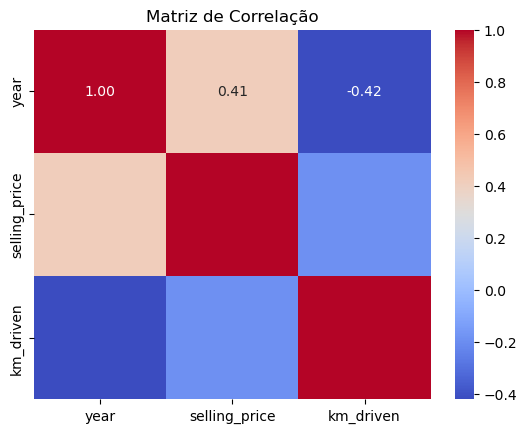

In [37]:
correlation_matrix = df1[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [39]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

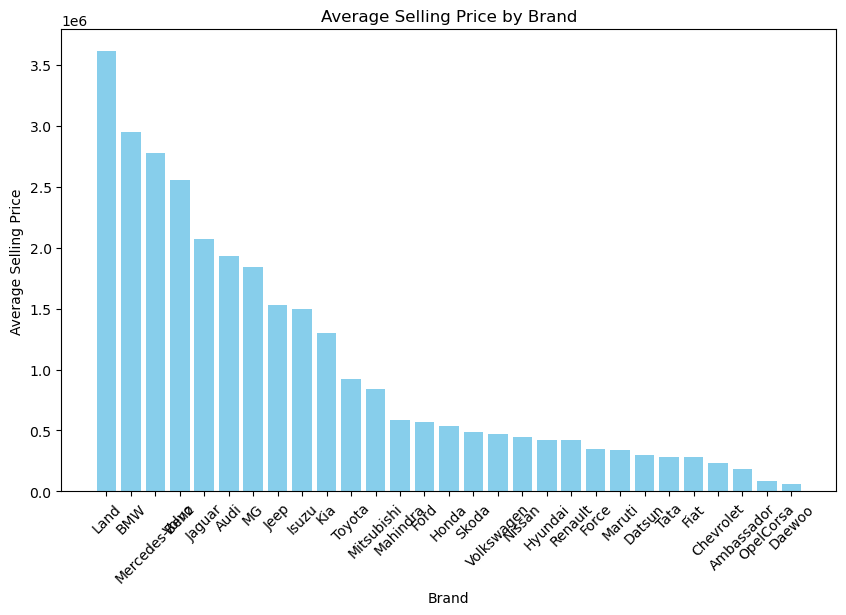

In [41]:
average_price_by_brand = df1.groupby('brand')['selling_price'].mean().reset_index()
average_price_by_brand = average_price_by_brand.sort_values(by='selling_price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_price_by_brand['brand'], average_price_by_brand['selling_price'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Brand')
plt.xticks(rotation=45)
plt.show()



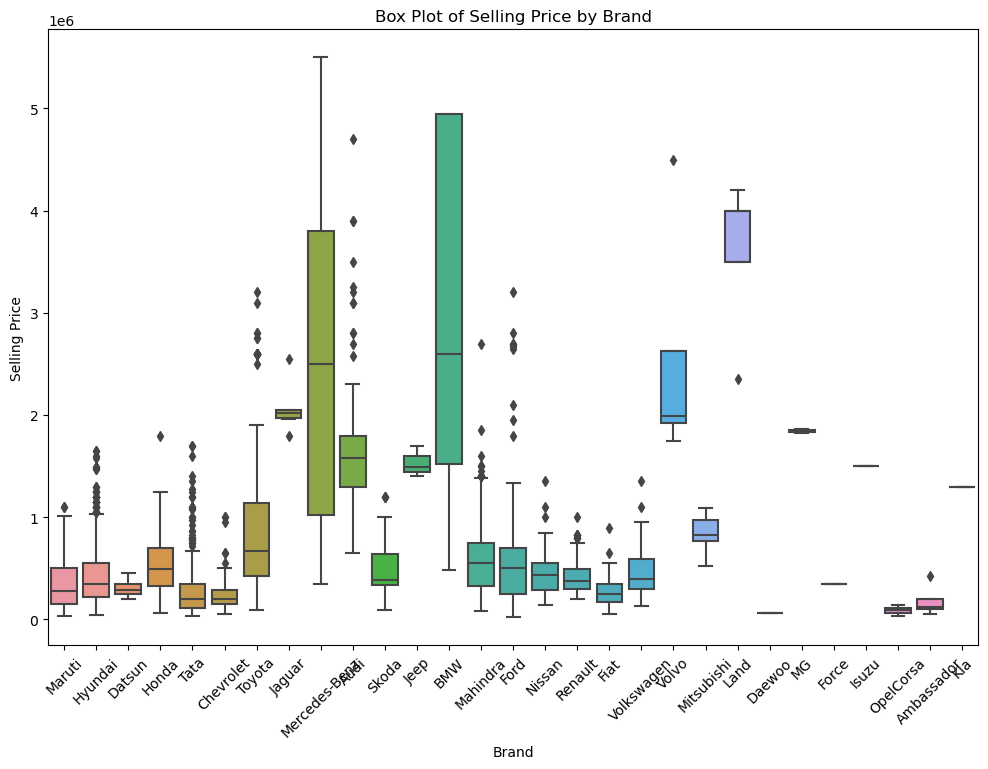

In [43]:
df1_filtered = df1[df1['selling_price'] < 6000000]
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='selling_price', data=df1_filtered)
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price by Brand')
plt.xticks(rotation=45)
plt.show()


In [44]:
max_year = df1['year'].max()
df1['age'] = max_year - df1['year']


In [45]:
df1.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [48]:
df1_encoded = pd.get_dummies(df1, columns=['brand', 'fuel', 'seller_type', 'transmission'])

In [49]:
df1_encoded.head()

,year,selling_price,km_driven,owner,age,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,2007,135000,50000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2012,600000,100000,First Owner,8,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,2017,250000,46000,First Owner,3,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,2014,450000,141000,Second Owner,6,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [51]:
# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar o label encoding à coluna 'owner'
df1_encoded['owner_encoded'] = label_encoder.fit_transform(df1_encoded['owner'])

In [53]:
df1_encoded.head()

,year,selling_price,km_driven,owner,age,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,...,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_encoded
0,2007,60000,70000,First Owner,13,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,0
1,2007,135000,50000,First Owner,13,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,0
2,2012,600000,100000,First Owner,8,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,0
3,2017,250000,46000,First Owner,3,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,0
4,2014,450000,141000,Second Owner,6,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,2


In [57]:
# Criar um dicionário para mapear os valores
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Aplicar o mapeamento à coluna 'owner'
df1_encoded['owner_encoded'] = df1_encoded['owner'].map(owner_mapping)

# Agrupar por 'owner' e 'owner_encoded' e contar o número de linhas em cada grupo
owner_counts = df1_encoded.groupby(['owner', 'owner_encoded']).size().reset_index(name='counts')
owner_counts

,owner,owner_encoded,counts
0,First Owner,1,2832
1,Fourth & Above Owner,4,81
2,Second Owner,2,1106
3,Test Drive Car,5,17
4,Third Owner,3,304


In [58]:
df_model = df1_encoded.copy()

In [64]:
columns_to_drop = [col for col in ['year', 'owner'] if col in df_model.columns]

# Remover as colunas existentes
df_model.drop(columns_to_drop, axis=1, inplace=True)
df_model.head()


,selling_price,km_driven,age,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_encoded
0,60000,70000,13,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,1
1,135000,50000,13,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,1
2,600000,100000,8,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
3,250000,46000,3,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,True,1
4,450000,141000,6,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,2


In [65]:
# Definir a variável dependente (target)
Y = df_model['selling_price']

# Definir as variáveis independentes
X = df_model.drop('selling_price', axis=1)

# Exibir as primeiras linhas para verificar o resultado
print("Variáveis independentes (X):")
print(X.head())
print("\nVariável dependente (Y):")
print(Y.head())

Variáveis independentes (X):
   km_driven  age  brand_Ambassador  brand_Audi  brand_BMW  brand_Chevrolet  \
0      70000   13             False       False      False            False   
1      50000   13             False       False      False            False   
2     100000    8             False       False      False            False   
3      46000    3             False       False      False            False   
4     141000    6             False       False      False            False   

   brand_Daewoo  brand_Datsun  brand_Fiat  brand_Force  ...  fuel_Diesel  \
0         False         False       False        False  ...        False   
1         False         False       False        False  ...        False   
2         False         False       False        False  ...         True   
3         False          True       False        False  ...        False   
4         False         False       False        False  ...         True   

   fuel_Electric  fuel_LPG  fuel_Petrol

In [ ]:
## dividir em treino e teste, normaliza e treina o modelo linear, treina algortimos de regressao. 